# Exploratory Data Analysis on Movies MySQL Database

## Intro

Import necessary modules to work with:

In [2]:
import pandas as pd
from mysql.connector import connect
from matplotlib import pyplot as plt
import seaborn as sns

## Movies ERD Schema
![alt text](./ERD%20Movies.png "Title")

<Axes: xlabel='relYear', ylabel='nr_movies'>

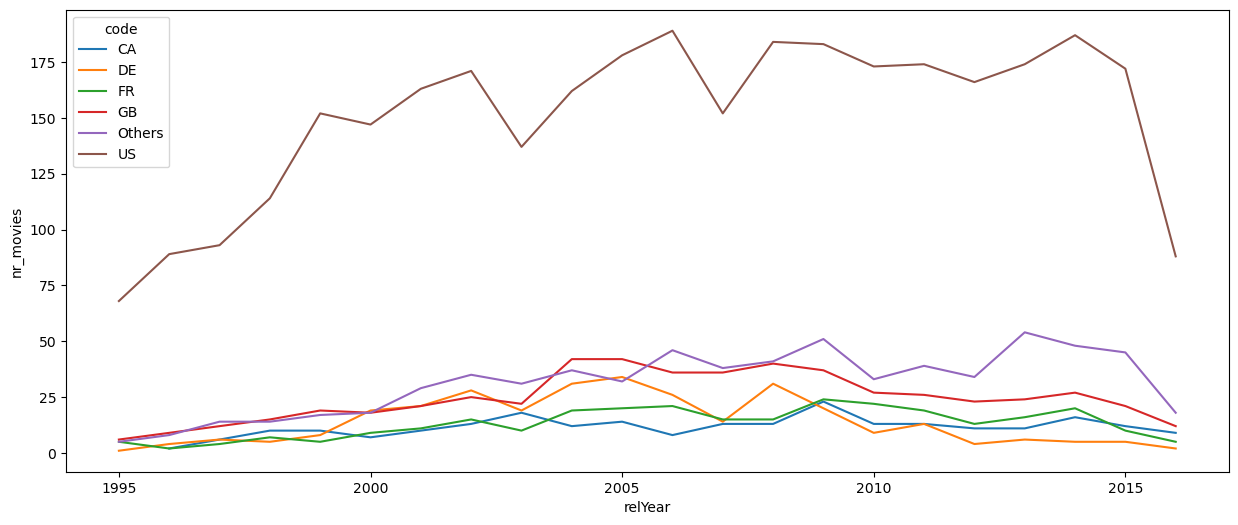

In [4]:
movies = connect(
    host="localhost",
    user="root",
    password="admin",
    database="movies"
)
cursor = movies.cursor()

QUERY = '''
SELECT (CASE when country_iso_code in ('US','GB','DE','FR','CA') then country_iso_code else "Others" 
    END) as code, 
    year(release_date) as relYear, 
    COUNT(DISTINCT title) as nr_movies
FROM movie m
LEFT JOIN production_country pc
ON m.movie_id = pc.movie_id
LEFT JOIN country c
ON pc.country_id = c.country_id
WHERE
	country_name IS NOT NULL
GROUP BY (CASE when country_iso_code in ('US','GB','DE','FR','CA') then country_iso_code else "Others" END), year(release_date)
ORDER BY 2 DESC;
'''

cursor.execute(QUERY)

df = pd.DataFrame(list(cursor), columns=cursor.column_names)

plt.figure(figsize=(15,6))
sns.lineplot(df[df['relYear'] >= 1995], x='relYear', y="nr_movies", hue='code' )

In [79]:
def fizzBuzz(n):
    # Write your code here
    for i in range(1, n+1):
        if (i % 3 == 0) and (i % 5 == 0): print("FizzBuzz")
        elif (i % 3 == 0) and (i % 5 != 0): print("Fizz")
        elif (i % 3 != 0) and (i % 5 == 0): print("Buzz")
        else: print(i)

fizzBuzz(15)

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz


In [1]:
from cassandra.cluster import Cluster
import pandas as pd

with Cluster(['127.0.0.1'],port=9042) as cluster:
    session = cluster.connect('cityinfo')
    res = session.execute("""SELECT * FROM cities""")
    df = pd.DataFrame(res)

df

,id,country,name
0,1,Pakistan,Karachi
1,2,Pakistan,Lahore
2,4,Germany,Berlin
3,3,UAE,Dubai
